# Silene- Hadene model 

this our general model adapted to Silene-Hadene system

N_1 population size of Silene.
N_2 Population size of Hadene (male)
N_3 Population size of Hadene (female)


$$ \frac{dN_1}{dt} = (-r_1 + b_{12} N_2 - b_{13} N_3 ) N_1 -(\alpha_{1} + c_1 (b_{12} N_2 -b_{13} N_3)) N_{1}^{2}$$

$$ \frac{dN_2}{dt} = (- r_2 + b_{23} N_3 ) N_2 -(\alpha_{2} + c_2 b_{23} N_3) N_{2}^{2}$$

$$ \frac{dN_3}{dt} = (-r_3 + b_{31} N_1 + b_{32} N_2 ) N_3 -(\alpha_{3} + c_3 (b_{31} N_1 + b_{32} N_2)) N_{3}^{2}$$

In [1]:
"""Libraries"""

from scipy.integrate import odeint #Used for solving the equation
from pylab import * #For using plot
%matplotlib inline

In [2]:
"""Function"""

r = lambda P, t: [(r1 + b12 * P[1] + b13*P[2])*P[0] - (alpha1 + c1*(b12*P[1] + b13*P[2]))*P[0]**2 , 
                (r2 + b21* P[0] + b23 * P[2])*P[1] - (alpha2 + c2*(b21*P[0] + b23*P[2]))*P[1]**2 , 
                  (r3 + b31 * P[0] + b32*P[1])*P[2] - (alpha3 + c3 *(b31*P[0] + b32*P[1]))*P[2]**2 ]



In [9]:
"""Parameters"""

P_0 = [100, 30, 30]

# Silene
alpha1 = 0.0001
r1 = -0.01
c1 = 0.001

# Hadena males
alpha2 = 0.0006
r2 = -0.1
c2= 0.001

#Hadena Females
alpha3 = 0.0006
r3 = -0.1
c3 = 0.001

# Interactions

b12= 0.00489
b21 = 0.0
b13 = -0.0049
b31 = 0.0025
b23 = 0.0057
b32 = 0.0025

In [10]:
t = linspace(0, 96*pi, 500)

P = odeint(r, P_0, t)

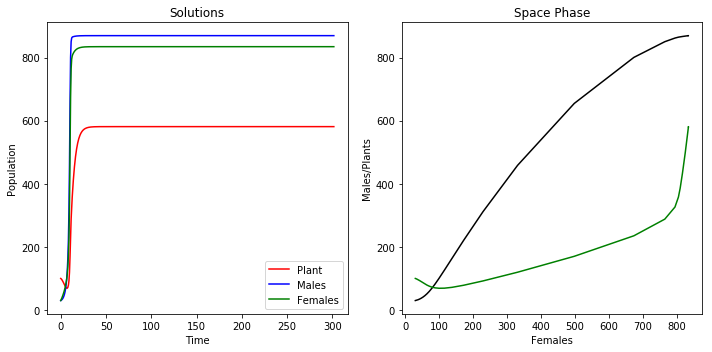

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,5))

axes[0].plot(t, P[:,0], 'r')
axes[0].plot(t, P[:,1], 'b')
axes[0].plot(t, P[:,2], 'g')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Population')
axes[0].set_title('Solutions')
axes[0].legend(('Plant','Males','Females'))

axes[1].plot(P[:,2], P[:,1], 'k')
axes[1].plot(P[:,2], P[:,0],'g')
axes[1].set_xlabel('Females')
axes[1].set_ylabel('Males/Plants')
axes[1].set_title('Space Phase')
    
fig.tight_layout()